In [31]:
!pip install pymongo
!pip install dnspython
!pip install pandas
import os
from pymongo import MongoClient

connection_string = os.environ.get('ConnectionStrings__photo-search')
client = MongoClient(connection_string)
db = client['photo-search']
collection = db['photos']
documents = collection.find()
    

,Model,Summary,Score,Score Explanation,Image
0,llama3.2-vision,"The photo depicts a live concert performance on stage at the O2 Arena in London. The stage is set with a large video screen displaying a vibrant cityscape, complete with neon lights and Japanese-style signage. A band is performing on stage, comprising three musicians: one playing an electric guitar, another on drums, and a third on bass. The lead guitarist stands prominently at the front of the stage, wearing a black shirt and jeans, holding his instrument in his left hand while strumming it with his right. He has long dark hair and appears to be singing into a microphone attached to his guitar. The drummer sits behind his kit, dressed in a white shirt and black pants, with his back turned towards the camera. The bassist stands slightly off-center on the stage, wearing a black shirt and jeans, holding his instrument in both hands. He has short dark hair and is positioned near the center of the stage, facing the lead guitarist. The background of the image features a large video screen displaying a cityscape with neon lights and Japanese-style signage. The overall atmosphere of the photo suggests a high-energy live performance, with the band members fully engaged in their music. The use of bright lighting and vibrant colors adds to the dynamic feel of the image, capturing the excitement and energy of the concert event.",85.000000,"The summary accurately describes the setting of a live concert performance with a band on stage, including details about the musicians and their instruments. The mention of the large video screen with a cityscape and neon lights is consistent with the image. The object classes 'Person,' 'Guitar,' and 'Drum Set' are correctly identified. The categories 'Music,' 'Performance,' and 'Concert' are appropriate for the image context. However, the summary could be slightly more concise, and some details about the musicians' appearance may not be fully verifiable from the image alone.",
1,llava-llama3,"The image captures a vibrant scene from a concert taking place at the O2 Arena in Greenwich, London. The stage is bathed in bright lights against a backdrop of a large screen displaying an urban landscape with buildings and neon signs. A band is performing on the stage, consisting of two members: one strumming a guitar and the other playing drums. The audience, visible in the foreground, appears to be thoroughly enjoying the concert. The photo was taken from the perspective of someone standing within the crowd, providing a first-person view of the event. The predominant colors in the image are blue and red, adding to the overall lively atmosphere of the scene. Please note that this description is based on the visible elements in the image and does not include any inferred or imagined content.",85.000000,"The summary accurately describes the concert scene, including the vibrant atmosphere, the presence of a band, and the audience's perspective. The mention of the O2 Arena in Greenwich, London, adds context, although this specific location is not verifiable from the image alone. The description of the stage lighting and colors is consistent with the image. The object classes are mostly accurate, identifying the band and the audience. However, the summary mentions two band members, while the image shows more. The large screen with neon lights is correctly identified, but the specific text 'nagasaki' is not visible in the image. The categories are appropriate, capturing the essence of a concert with neon lights and a live performance. Overall, the summary and predictions are mostly accurate, with minor discrepancies in details.",
2,llava:13b,"The photo depicts a live concert scene inside an arena. In the foreground, there is a stage with performers playing musical instruments and singing. The lighting is bright, highlighting the musicians and creating a dynamic atmosphere. Behind the stage, there's a large screen displaying a vibrant cityscape that resem
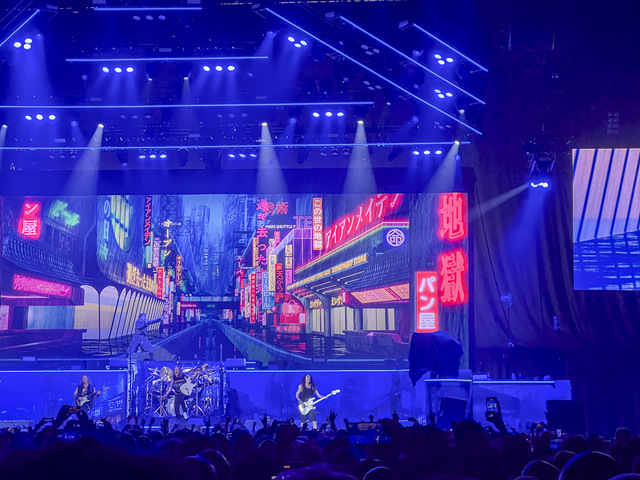
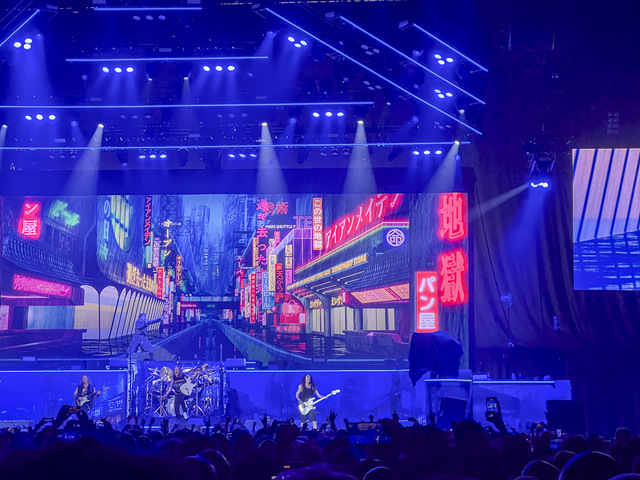
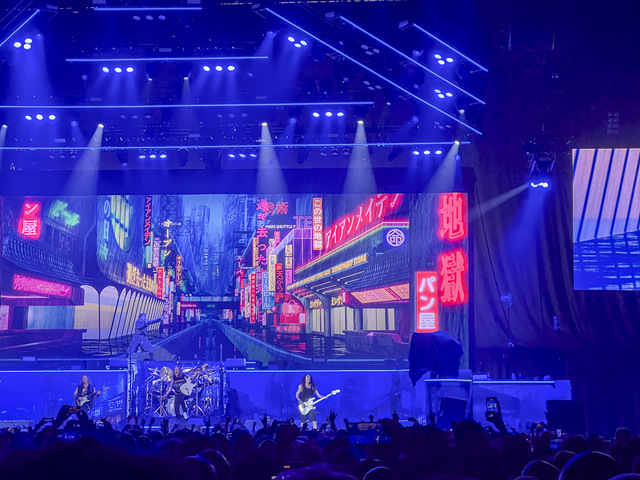
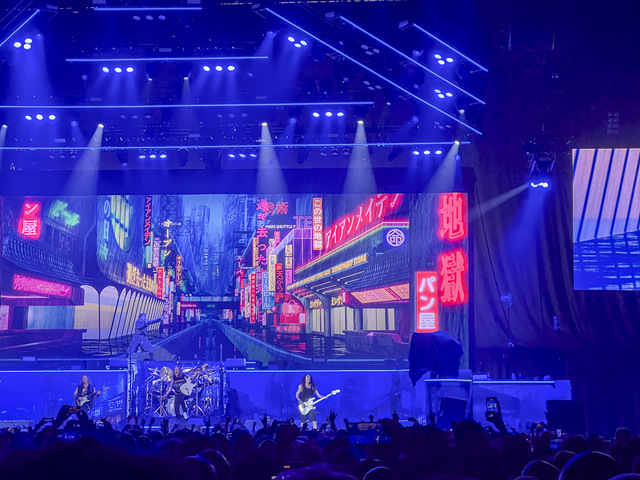
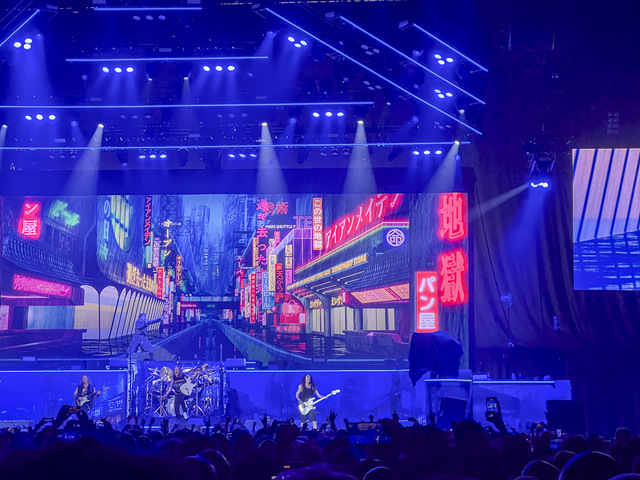

In [48]:
import base64
import pandas as pd
from IPython.display import HTML, display

def base64_to_image(base64_string, max_width=320):
    return f'<img src="data:image/jpeg;base64,{base64_string}" style="max-width: {max_width}px;" />'


evaluations = []

documents = collection.find()
for document in documents:
    thumbBase64 = document["Base64Data"]
    for i, (key, value) in enumerate(document["PhotoSummaries"].items()):
        model = key
        summary = value["Description"]
        score = value["PhotoSummaryScore"]["Score"]
        scoreJustification = value["PhotoSummaryScore"]["Justification"]
        
        evaluation = {
            'thumbBase64': thumbBase64,
            'model': model,
            'summary': summary,
            'score': score,
            'scoreJustification': scoreJustification
        }
        evaluations.append(evaluation)
df = pd.DataFrame(evaluations)
df['thumbnail'] = df['thumbBase64'].apply(base64_to_image)
df = df.drop(columns=['thumbBase64'])
df = df.rename(columns={
    'model': 'Model',
    'summary': 'Summary',
    'score': 'Score',
    'scoreJustification': 'Score Explanation',
    'thumbnail': 'Image'
})

styled_df = df.head(5).style.set_properties(**{'text-align': 'left'})
display(HTML(styles + styled_df.to_html(escape=False, index=False)))


In [57]:
# Calculate the average score for each model
# Convert the 'Score' column to a numeric data type


model_scores = df.groupby('Model')['Score'].mean().reset_index()
model_scores = model_scores.rename(columns={'Score': 'Model Score'})
model_scores = model_scores.sort_values('Model Score', ascending=False).reset_index()
model_scores = model_scores.drop(columns=['index'])
model_scores['Model Score'] = model_scores['Model Score'].round(2).astype(str)
model_scores_styled = model_scores.head(5).style.set_properties(**{'text-align': 'left'})
display(HTML(model_scores_styled.to_html(escape=False, index=False)))


,Model,Model Score
0,llava:13b,85.6
1,Florence-2-large-ft,85.2
2,llava:7b,84.7
3,llama3.2-vision,84.1
4,llava-phi3,80.7


In [60]:
# Get the model with the highest average score
best_model = model_scores.loc[model_scores['Model Score'].astype(float).idxmax(), 'Model']

# Filter the original DataFrame to include only the best model
best_model_results = df[df['Model'] == best_model].copy()
best_model_results['Score'] = best_model_results['Score'].round(2).astype(str)
# Display the results for the best model
best_model_results_styled = best_model_results.head(50).style.set_properties(**{'text-align': 'left'})
display(HTML(best_model_results_styled.to_html(escape=False, index=False)))

AttributeError: 'DataFrame' object has no attribute 'clone'

In [12]:

import torch

print(torch.cuda.is_available())
print(torch.cuda.device_count())
print(torch.cuda.current_device())
torch.cuda.device(0)

True
1
0
